In [1]:
from ultralytics import YOLO

In [2]:
import torch

In [3]:
model=YOLO('best.pt')

C:\Users\ALVI COMPUTER\.conda\envs\traning_env\lib\site-packages\ultralytics\nn\tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_locat

In [4]:
type(model)

ultralytics.models.yolo.model.YOLO

In [5]:
import matplotlib.pyplot as plt
img=plt.imread('C:\\Users\\ALVI COMPUTER\\Downloads\\Compressed\\data_num_plates\\valid\\images\\Cars150_png.rf.6574f5da2c9d23e98e921611fa94dd0e.jpg')

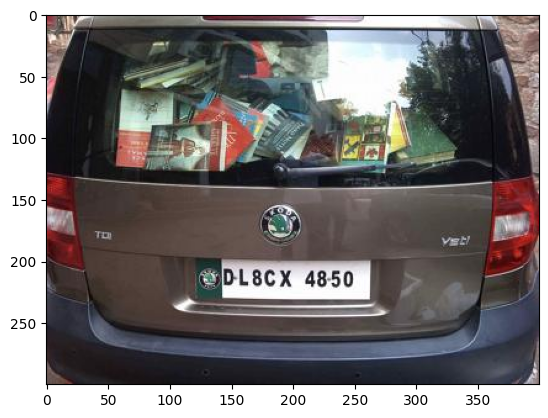

In [6]:
plt.imshow(img)

In [7]:
res=model.predict(img,save=True)
res[0].plot()


0: 480x640 1 licence, 822.8ms
Speed: 19.9ms preprocess, 822.8ms inference, 14.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to C:\Users\ALVI COMPUTER\runs\detect\predict


array([[[142,  42,  52],
        [144,  47,  56],
        [146,  50,  62],
        ...,
        [174, 143, 141],
        [145, 113, 114],
        [145, 113, 114]],

       [[146,  46,  56],
        [146,  49,  58],
        [145,  49,  61],
        ...,
        [155, 125, 123],
        [138, 108, 108],
        [134, 104, 104]],

       [[143,  46,  55],
        [144,  49,  57],
        [144,  51,  62],
        ...,
        [150, 122, 119],
        [144, 116, 115],
        [121,  93,  92]],

       ...,

       [[ 98,  82,  82],
        [103,  87,  87],
        [ 95,  80,  77],
        ...,
        [150, 135, 138],
        [146, 130, 131],
        [132, 116, 117]],

       [[ 96,  80,  80],
        [101,  85,  85],
        [ 92,  77,  74],
        ...,
        [154, 139, 142],
        [144, 128, 129],
        [131, 113, 113]],

       [[ 94,  78,  78],
        [100,  84,  84],
        [ 92,  77,  74],
        ...,
        [156, 142, 142],
        [141, 122, 124],
        [129, 111, 111]]

In [8]:
type(res[0])

ultralytics.engine.results.Results

In [9]:
boxes=res[0].boxes

In [10]:
boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.8660])
data: tensor([[128.4354, 197.5882, 267.0848, 232.3269,   0.8660,   0.0000]])
id: None
is_track: False
orig_shape: (300, 400)
shape: torch.Size([1, 6])
xywh: tensor([[197.7601, 214.9576, 138.6494,  34.7387]])
xywhn: tensor([[0.4944, 0.7165, 0.3466, 0.1158]])
xyxy: tensor([[128.4354, 197.5882, 267.0848, 232.3269]])
xyxyn: tensor([[0.3211, 0.6586, 0.6677, 0.7744]])

In [11]:
type(boxes)

ultralytics.engine.results.Boxes

In [12]:
len(boxes)

1

In [13]:
box = res[0].boxes.xyxy

In [14]:
box

tensor([[128.4354, 197.5882, 267.0848, 232.3269]])

In [15]:
x=box[0][0]
x

tensor(128.4354)

In [20]:
def save_cropped_image(image, box):
    x_min, y_min, x_max, y_max = box[0][0:4]
    
    # Convert coordinates to integers if they are not already
    x_min, y_min, x_max, y_max = int(x_min), int(y_min), int(x_max), int(y_max)
    
    # Crop the image using the bounding box coordinates
    cropped_image = image[y_min:y_max, x_min:x_max]
    
    # Display the cropped image
    return cropped_image

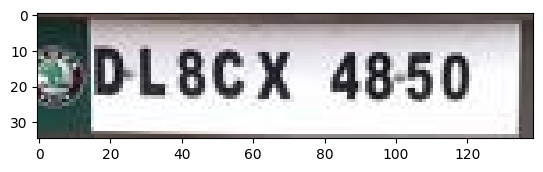

In [21]:
img=save_cropped_image(img, box)
plt.imshow(img)

In [18]:
from paddleocr import PaddleOCR

In [23]:
ocr = PaddleOCR(use_angle_cls=True, lang='en')
def extract_text(img,ocr):
    result = ocr.ocr(img, cls=True)
    text=""
    for line in result:
        for word_info in line:
            text+=word_info[1][0]
    return text

[2024/08/01 00:16:09] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\ALVI COMPUTER/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\ALVI COMPUTER/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320'

In [24]:
num_plate=extract_text(img,ocr)

[2024/08/01 00:16:31] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.3374907970428467
[2024/08/01 00:16:31] ppocr DEBUG: cls num  : 1, elapsed : 0.07823038101196289
[2024/08/01 00:16:32] ppocr DEBUG: rec_res num  : 1, elapsed : 0.30310654640197754


In [25]:
print(num_plate)

DL8CX48-50
